# Homework 5 Assignment 3
## By: Yukun Wan / yw3447

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# 1. DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [64]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
%pylab inline

import os

#this makes my plots pretty! but it is totally not mandatory to do it
#import json
#s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

#plus importing scipy.stats
import scipy.stats
pl.style.use('seaborn')

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Download the data

df_ = pd.read_csv('https://raw.githubusercontent.com/fedhere/PUI2017_fb55/master/HW5_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv')
df_.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [161]:
ms = pd.read_csv('data-pvLFI.csv')
pop = pd.read_csv( 'API_SP.POP.TOTL_DS2_en_csv_v2.csv')
gdp = pd.read_csv( 'API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv')

In [5]:
df_ = df_.merge(ms, right_on="Country", left_on="Country/Territory")
df_.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,Australia,15.0,4
1,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,Austria,30.4,1
2,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,Canada,30.8,4
3,Denmark,DK,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,Denmark,12.0,0
4,Finland,FI,CTS,19.8,24.0,0.45,4.0,45.3,2400000.0,Finland,45.3,2


In [6]:
pop.head()

,Country Name,Country Code,2012
0,Aruba,ABW,102577.0
1,Afghanistan,AFG,30696958.0
2,Angola,AGO,25096150.0
3,Albania,ALB,2900401.0
4,Andorra,AND,82431.0


In [7]:
pop = pop.merge(gdp, right_on="Country Name", left_on="Country Name")
pop.head()

,Country Name,Country Code_x,2012_x,Country Code_y,2012_y
0,Aruba,ABW,102577.0,ABW,NaN
1,Afghanistan,AFG,30696958.0,AFG,2.053654e+10
2,Angola,AGO,25096150.0,AGO,1.153980e+11
3,Albania,ALB,2900401.0,ALB,1.231978e+10
4,Andorra,AND,82431.0,AND,3.146152e+09


In [8]:
pop.columns = [u'Country Name', u'Country Code', u'pop', u'Country Code_y', u'gdp']
pop.drop(['Country Code_y'],axis=1,inplace=True)

In [9]:
pop.head()

,Country Name,Country Code,pop,gdp
0,Aruba,ABW,102577.0,NaN
1,Afghanistan,AFG,30696958.0,2.053654e+10
2,Angola,AGO,25096150.0,1.153980e+11
3,Albania,ALB,2900401.0,1.231978e+10
4,Andorra,AND,82431.0,3.146152e+09


In [10]:
df_ = df_.merge(pop, right_on="Country Name", left_on="Country/Territory")
df_.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Country,Guns/100 inhabitants,Number of mass shootings,Country Name,Country Code,pop,gdp
0,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,Australia,15.0,4,Australia,AUS,22728254.0,1.538190e+12
1,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,Austria,30.4,1,Austria,AUT,8429991.0,4.074520e+11
2,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,Canada,30.8,4,Canada,CAN,34750545.0,1.824290e+12
3,Denmark,DK,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,Denmark,12.0,0,Denmark,DNK,5591572.0,3.271490e+11
4,Finland,FI,CTS,19.8,24.0,0.45,4.0,45.3,2400000.0,Finland,45.3,2,Finland,FIN,5413971.0,2.567060e+11


In [11]:
df_.keys()

Index([                       u'Country/Territory',
                                       u'ISO code',
                                         u'Source',
                      u'% of homicides by firearm',
                 u'Number of homicides by firearm',
       u'Homicide by firearm rate per 100,000 pop',
                      u'Rank by rate of ownership',
                u'Average firearms per 100 people',
            u'Average total all civilian firearms',
                                        u'Country',
                           u'Guns/100 inhabitants',
                       u'Number of mass shootings',
                                   u'Country Name',
                                   u'Country Code',
                                            u'pop',
                                            u'gdp'],
      dtype='object')

In [12]:
df_.drop([u'ISO code',u'Source',u'% of homicides by firearm',
       u'Homicide by firearm rate per 100,000 pop',
                      u'Rank by rate of ownership',
                u'Average firearms per 100 people',
                                   u'Country Name',
                                   u'Country Code'],axis=1,inplace=True)

In [13]:
df_.rename(columns={'Country/Territory': 'Country Name'}, inplace=True)
#df_.dropna()

,Country Name,Number of homicides by firearm,Average total all civilian firearms,Country,Guns/100 inhabitants,Number of mass shootings,pop,gdp
0,Australia,30.0,3050000.0,Australia,15.0,4,22728254.0,1.538190e+12
1,Austria,18.0,2500000.0,Austria,30.4,1,8429991.0,4.074520e+11
2,Canada,173.0,9950000.0,Canada,30.8,4,34750545.0,1.824290e+12
3,Denmark,15.0,650000.0,Denmark,12.0,0,5591572.0,3.271490e+11
4,Finland,24.0,2400000.0,Finland,45.3,2,5413971.0,2.567060e+11


In [15]:
df_

,Country Name,Number of homicides by firearm,Average total all civilian firearms,Country,Guns/100 inhabitants,Number of mass shootings,pop,gdp
0,Australia,30.0,3050000.0,Australia,15.0,4,22728254.0,1.538190e+12
1,Austria,18.0,2500000.0,Austria,30.4,1,8429991.0,4.074520e+11
2,Canada,173.0,9950000.0,Canada,30.8,4,34750545.0,1.824290e+12
3,Denmark,15.0,650000.0,Denmark,12.0,0,5591572.0,3.271490e+11
4,Finland,24.0,2400000.0,Finland,45.3,2,5413971.0,2.567060e+11
5,France,35.0,19000000.0,France,31.2,6,65659790.0,2.681420e+12
6,Germany,158.0,25000000.0,Germany,30.3,7,80425823.0,3.543980e+12
7,Greece,29.0,2500000.0,Greece,22.5,0,11045011.0,2.456710e+11
8,Hungary,7.0,560000.0,Hungary,5.5,0,9920362.0,1.273210e+11
9,Iceland,0.0,90000.0,Iceland,30.3,0,320716.0,1.421858e+10


# 2. exploration

In [128]:
def plotscatter(ax,x,y,x_label,y_label,error=False,pp=False):
    if pp == False:
        scatter = ax.scatter( x, y, label='y' )
        if error == True:
            ax.errorbar(x, y, yerr = np.sqrt(y), fmt = '.')
    else:
        scatter = ax.scatter( x, y / df_['pop'] * 1e6 ,label='y')
        if error == True:
            ax.errorbar(x, y / df_['pop'] * 1e6, yerr = np.sqrt(y) / df_['pop'] * 1e6, fmt = '.', label='yerror')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()
    
    return ax

## 2.1 plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?

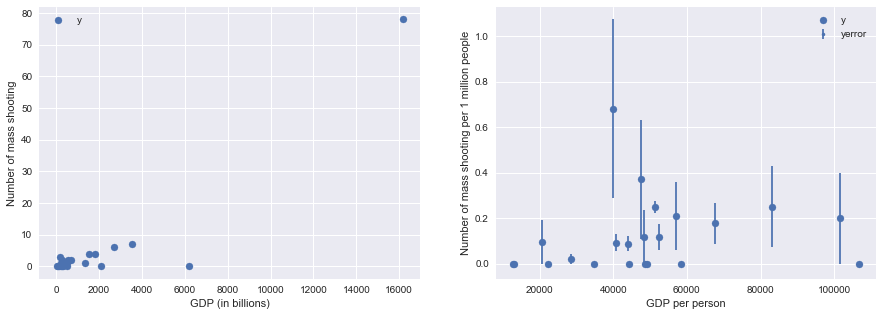

In [129]:
fig = pl.figure(figsize=(15,5)) 

# plot mass shooting vs gdp in absolute numbers
ax1 = fig.add_subplot(121)

x = df_.gdp / 1e9
y = df_['Number of mass shootings']
x_label = "GDP (in billions)"
y_label = "Number of mass shooting"
ax1 = plotscatter(ax1,x,y,x_label,y_label)


# plot mass shooting per person vs gdp per person
ax2 = fig.add_subplot(122)

x = df_['gdp'] / df_['pop']
y = df_['Number of mass shootings']
x_label = "GDP per person"
y_label = "Number of mass shooting per 1 million people"

ax2 = plotscatter(ax2,x,y,x_label,y_label,True, True)

pl.show()

**Figure 1:** Number of mass shooting vs GDP / GDP per person, errors represent Poisson statistics.

In the first plot, the datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings.
When accounted with per capita, however, the gap is largely shortened and that point no longer looks like an outlier.The correlations in both graphs do not seem strong, but could potentially be a weak positive correlation.


## 2.2 plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

**I am going to plot the average number of civilian fire arms per person against the gdp per person**

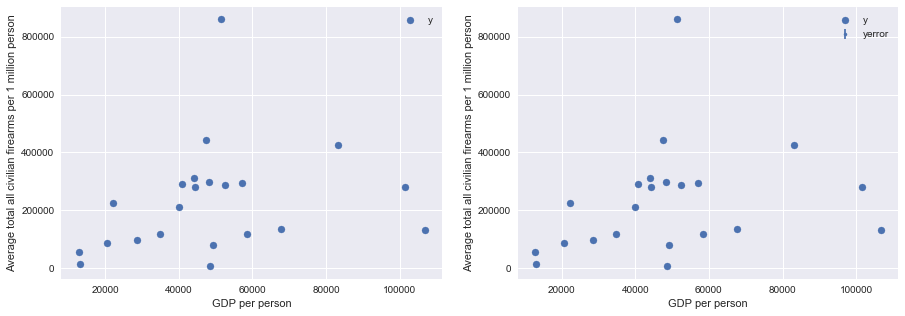

In [167]:
fig = pl.figure(figsize=(15,5)) 

x = df_['gdp'] / df_['pop']
y = df_['Average total all civilian firearms']
x_label = "GDP per person"
y_label = "Average total all civilian firearms per 1 million person"

# without error
ax1 = fig.add_subplot(121)
ax1 = plotscatter(ax1,x,y,x_label,y_label,pp=True)
#scatter = ax1.scatter( x, y / df_['pop'] )
#ax1.set_xlabel(x_label)
#ax1.set_ylabel(y_label)
#ax1.legend()

# with error
ax2 = fig.add_subplot(122)
ax2 = plotscatter(ax2,x,y,x_label,y_label,error=True,pp=True)
#scatter = ax2.scatter( x, y / df_['pop'], label = 'y')
#ax2.errorbar(x, y / df_['pop'], yerr = np.sqrt(y) / df_['pop'], fmt = '.')
#ax2.set_xlabel(x_label)
#ax2.set_ylabel(y_label)
#ax2.legend()

pl.show()

**Figure 2:** Average number of civilian fire arms per person against GDP per person.

the average number of civilian fire arms per person against the gdp per person, errors represent Poisson statistics.

In the first plot, the datapoint to the top of the plot seems to be outlier, which has the highest average total all civilian firearms per person. 
In the second plot, the error is too small to show.

## 2.3 plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

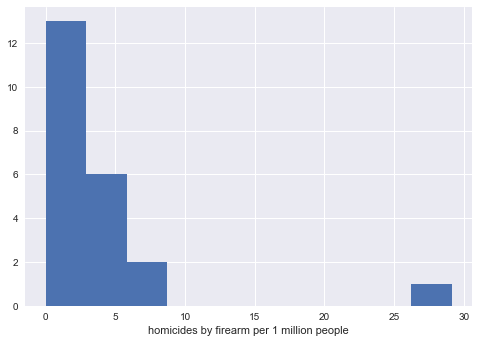

In [132]:
fig, ax = plt.subplots()
df_['homi_pp_1000'] = df_['Number of homicides by firearm'] / df_['pop'] * 1e6

ax.hist(df_['homi_pp_1000'])
ax.set_xlabel('homicides by firearm per 1 million people');


**Figure 3:** Average number of homicides by firearms per person.

There is one particular country that has higher average number of homicides by firearms, which is USA.

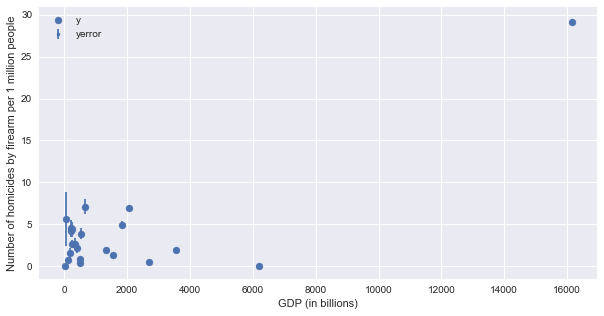

In [133]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

x = df_.gdp / 1e9
y = df_['Number of homicides by firearm']
x_label = "GDP (in billions)"
y_label = "Number of homicides by firearm per 1 million people"

ax = plotscatter(ax,x,y,x_label,y_label,True,True)

pl.show()


**Figure 4:** Average number of homicides against gdp total, not gdp per person.

There does not seem to have an obvious correlation. The outlier is the upper-right point, which has both the highest GDP and the highest number of homicides by firearm per person.

## 2.4 plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [134]:
df_

,Country Name,Number of homicides by firearm,Average total all civilian firearms,Country,Guns/100 inhabitants,Number of mass shootings,pop,gdp,homi_pp_1000,CivFirearmsPP,NumMassShootPP
0,Australia,30.0,3050000.0,Australia,15.0,4,22728254.0,1.538190e+12,1.319943,0.134194,0.175992
1,Austria,18.0,2500000.0,Austria,30.4,1,8429991.0,4.074520e+11,2.135234,0.296560,0.118624
2,Canada,173.0,9950000.0,Canada,30.8,4,34750545.0,1.824290e+12,4.978339,0.286326,0.115106
3,Denmark,15.0,650000.0,Denmark,12.0,0,5591572.0,3.271490e+11,2.682609,0.116246,0.000000
4,Finland,24.0,2400000.0,Finland,45.3,2,5413971.0,2.567060e+11,4.432975,0.443298,0.369415
5,France,35.0,19000000.0,France,31.2,6,65659790.0,2.681420e+12,0.533051,0.289370,0.091380
6,Germany,158.0,25000000.0,Germany,30.3,7,80425823.0,3.543980e+12,1.964543,0.310845,0.087037
7,Greece,29.0,2500000.0,Greece,22.5,0,11045011.0,2.456710e+11,2.625620,0.226347,0.000000
8,Hungary,7.0,560000.0,Hungary,5.5,0,9920362.0,1.273210e+11,0.705619,0.056450,0.000000
9,Iceland,0.0,90000.0,Iceland,30.3,0,320716.0,1.421858e+10,0.000000,0.280622,0.000000


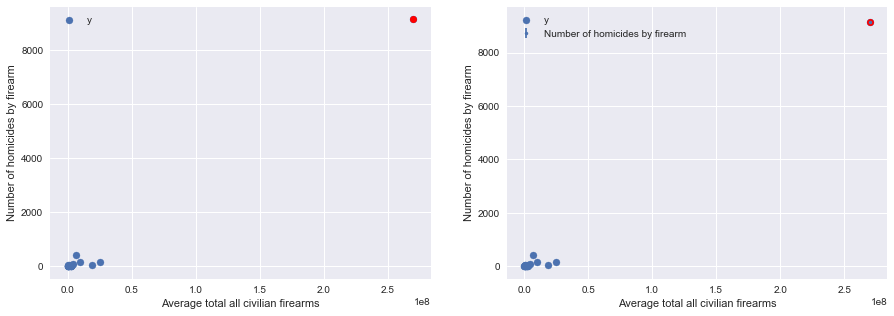

In [135]:
fig = pl.figure(figsize=(15,5)) 

# without error
ax1 = fig.add_subplot(121)

x = df_['Average total all civilian firearms']
y = df_['Number of homicides by firearm']
x_label = "Average total all civilian firearms"
y_label = "Number of homicides by firearm"

ax1 = plotscatter(ax1,x,y,x_label,y_label)
usa = ax1.plot(df_['Average total all civilian firearms'][21], df_['Number of homicides by firearm'][21], 'ro')

# with error
ax2 = fig.add_subplot(122)

ax2 = plotscatter(ax2,x,y,x_label,y_label,True)
usa = ax2.plot(df_['Average total all civilian firearms'][21], df_['Number of homicides by firearm'][21], 'ro')

pl.show()


**Figure 5:** Number of homicides by firearms against the number of civilian firearms

The US is in red color and is the outlier, which has both the highest average total all civilian firearms and the number of homicides by firearms. Since the US is stretching the plots, the errorbars are too small to observe. It is not easy to examine potential correlations.

## 2.5 plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


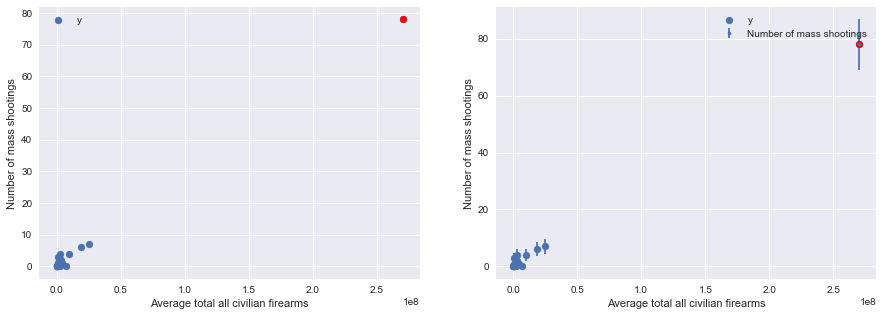

In [136]:
fig = pl.figure(figsize=(15,5)) 

# without error
ax1  = fig.add_subplot(121)

x = df_['Average total all civilian firearms']
y = df_['Number of mass shootings']
x_label = "Average total all civilian firearms"
y_label = "Number of mass shootings"

ax1 = plotscatter(ax1,x,y,x_label,y_label)
usa = ax1.plot(df_['Average total all civilian firearms'][21], df_['Number of mass shootings'][21], 'ro')

# with error
ax2  = fig.add_subplot(122)

ax2 = plotscatter(ax2,x,y,x_label,y_label,True)
usa = ax2.plot(df_['Average total all civilian firearms'][21], df_['Number of mass shootings'][21], 'ro')

pl.show()


**Figure 6:** Number of mass shootings against the number of civilian firearms

The US is outlier again, with a long errorbar. There could potentially be a positive correlation between mass shooting and the amount of civilian firearms.

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




**Set magnitide**

In [137]:
df_['CivFirearmsPP'] = df_['Average total all civilian firearms'] / df_['pop'] * 1000
df_['NumMassShootPP'] = df_['Number of mass shootings'] / df_['pop'] * 1000

In [138]:
#CivFirearmsPP is the Average total all civilian firearms per 1000 person
#NumMassShootPP is the Number of mass shootings per 1000 person

#verify the magnitude

print("magnitude of the Average total all civilian firearms per person is {}".format(df_['CivFirearmsPP'].mean()))
print("magnitude of the Number of mass shootings per person is {}".format(df_['NumMassShootPP'].mean()))

magnitude of the Average total all civilian firearms per person is 228.950085729
magnitude of the Number of mass shootings per person is 0.000121021254397


In [139]:
# Because the magnitude of two parameters are not the same, I need to do some modification

#CivFirearmsPP is the Average total all civilian firearms per person
#NumMassShootPP is the Number of mass shootings per 1 million person
df_['CivFirearmsPP'] = df_['Average total all civilian firearms'] / df_['pop'] 
df_['NumMassShootPP'] = df_['Number of mass shootings'] / df_['pop'] * 1e6

print("magnitude of the Average total all civilian firearms per person is {}".format(df_['CivFirearmsPP'].mean()))
print("magnitude of the Number of mass shootings per person is {}".format(df_['NumMassShootPP'].mean()))


magnitude of the Average total all civilian firearms per person is 0.228950085729
magnitude of the Number of mass shootings per person is 0.121021254397


**1. OLS**

In [146]:
#statsmodels OLS

lm1 = smf.ols(formula="NumMassShootPP ~ CivFirearmsPP", data=df_).fit()
lm1.summary()

#lm1 = sm.OLS(df_['NumMassShootPP'], df_['CivFirearmsPP']).fit()
#lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         NumMassShootPP   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     4.971
Date:                Tue, 17 Oct 2017   Prob (F-statistic):             0.0374
Time:                        18:56:16   Log-Likelihood:                 11.424
No. Observations:                  22   AIC:                            -18.85
Df Residuals:                      20   BIC:                            -16.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0315      0.051      0.612      0.548      -0.076       0.139
CivFirearmsPP     0.3911      0.175      2.230      0.037       0.025       0.757
==============================================================================
Omnibus:                       34.840   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.018
Skew:                           2.733   Prob(JB):                     7.71e-20
Kurtosis:                      11.133   Cond. No.                         5.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpret:** The coefficient of firearms per person is significant, which is 0.3911. The inference is that each increase of 10 firearms per person is predicting roughly 3 to 4 mass shootings per million people in average.

In [147]:
#statsmodels WLS

# set weight for WLS
# when Number of mass shootings <> 0, weight = 1 / sqrt(yerror)
# when Number of mass shootings == 0, weight = 1 --- to aviod infinite in weight
yerr = np.sqrt(df_['Number of mass shootings']) / df_['pop'] * 1e6
w = np.zeros(len(yerr))
for i in range(len(yerr)):
    if yerr[i] == 0:
        w[i] = 1
    else:
        w[i] = 1.0 / yerr[i]

print(w)


[ 11.364127     8.429991    17.3752725    1.           3.82825561
  26.80549702  30.39810381   1.           1.           1.           1.           1.
   1.           1.           2.54501772   5.018573     1.          10.514844
  46.773055     6.73121391   5.65463464  35.55331533]


In [160]:
# in function smf.wls, if you pass 1/w in weight, the variables will be pre-multiplied by 1 / sqrt(w)

lm2 = smf.wls(formula="NumMassShootPP ~ CivFirearmsPP",weights=w ** 2,data=df_).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:         NumMassShootPP   R-squared:                       0.829
Model:                            WLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     96.83
Date:                Tue, 17 Oct 2017   Prob (F-statistic):           4.14e-09
Time:                        19:23:36   Log-Likelihood:                 11.244
No. Observations:                  22   AIC:                            -18.49
Df Residuals:                      20   BIC:                            -16.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0101      0.013      0.794      0.436      -0.016       0.037
CivFirearmsPP     0.2825      0.029      9.840      0.000       0.223       0.342
==============================================================================
Omnibus:                        3.929   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.140   Jarque-Bera (JB):                2.524
Skew:                           0.822   Prob(JB):                        0.283
Kurtosis:                       3.222   Cond. No.                         3.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpret:**
The coefficient of firearms per person is significant, which is 0.2825.
The inference is that each increase of 10 firearms per person is predicting roughly 2 to 3 mass shootings per million people in average.

The adjusted $R^2$ also rise from 0.199 to 0.829, meaning that this could be a better model in predicting their relationship.

### Fit the line

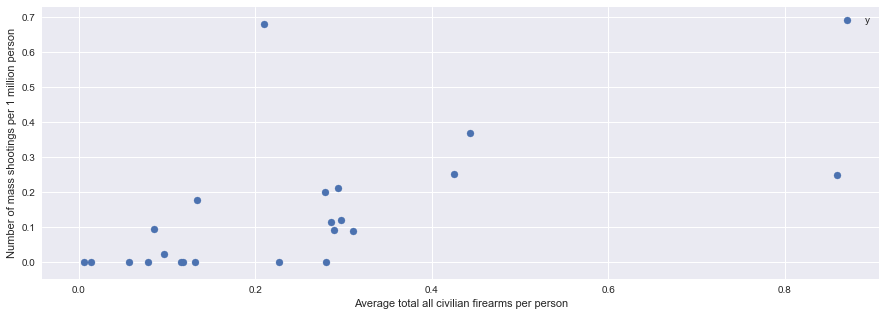

In [149]:
fig = pl.figure(figsize=(15,5))
ax = fig.add_subplot(111)

ax.scatter(df_['CivFirearmsPP'], df_['NumMassShootPP'], label = "y")
ax.set_ylabel("Number of mass shootings per 1 million person")
ax.set_xlabel("Average total all civilian firearms per person")
ax.legend()

pl.show()

**Figure 7:** Number of mass shootings per person against Average total all civilian firearms per 1 million person

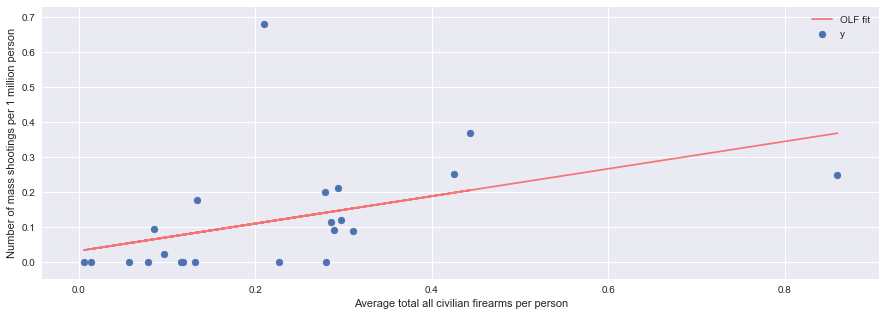

In [150]:
fig = pl.figure(figsize=(15,5))
ax = fig.add_subplot(111)

ax.scatter(df_['CivFirearmsPP'], df_['NumMassShootPP'], label = "y")
ax.plot(df_['CivFirearmsPP'], lm1.predict(), 'r-', alpha=0.5, label='OLF fit')
ax.set_ylabel("Number of mass shootings per 1 million person")
ax.set_xlabel("Average total all civilian firearms per person")

ax.legend()
pl.show()

**Figure 8:** Use statsmodels OLS to fit the line

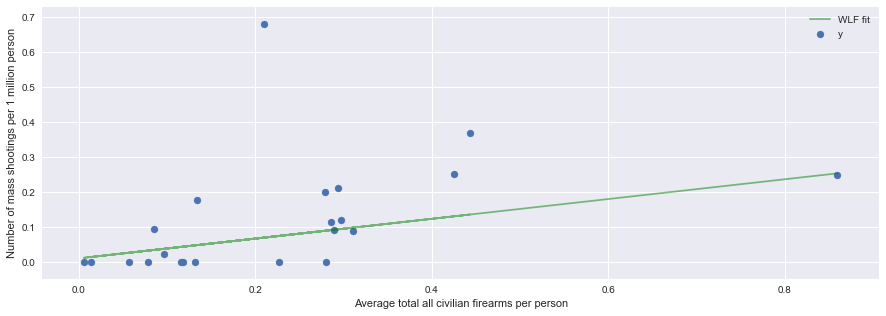

In [151]:
fig = pl.figure(figsize=(15,5))
ax = fig.add_subplot(111)

ax.scatter(df_['CivFirearmsPP'], df_['NumMassShootPP'], label = "y")
ax.plot(df_['CivFirearmsPP'], lm2.predict(), 'g', alpha=0.5, label='WLF fit')
ax.set_ylabel("Number of mass shootings per 1 million person")
ax.set_xlabel("Average total all civilian firearms per person")

ax.legend()
pl.show()

**Figure 9:** Use statsmodels WLS to fit the line

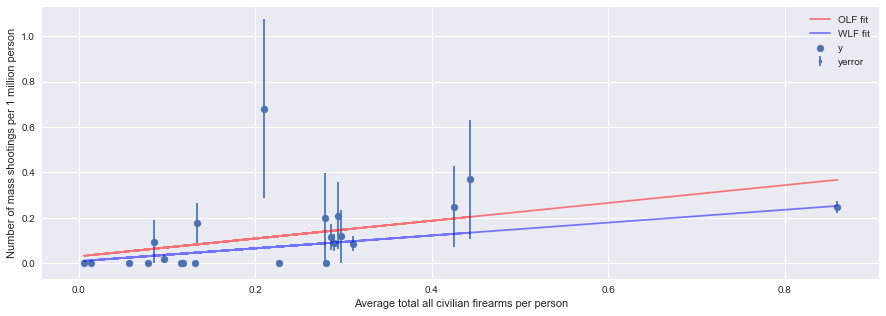

In [152]:
fig = pl.figure(figsize=(15,5))
ax = fig.add_subplot(111)
#sns.regplot(x="CivFirearmsPP", y="NumMassShootPP", data=df_)
ax.scatter(df_['CivFirearmsPP'], df_['NumMassShootPP'], label = "y")
ax.plot(df_['CivFirearmsPP'], lm1.predict(), 'r', alpha=0.5, label='OLF fit')
ax.plot(df_['CivFirearmsPP'], lm2.predict(), 'b', alpha=0.5, label='WLF fit')
ax.set_ylabel("Number of mass shootings per 1 million person")
ax.set_xlabel("Average total all civilian firearms per person")
ax.errorbar(df_['CivFirearmsPP'], df_['NumMassShootPP'], yerr = np.sqrt(df_['Number of mass shootings']) / df_['pop'] * 1e6, fmt = '.', label='yerror')

ax.legend()
pl.show()

**Figure 10:** Use statsmodels OLS and WLS to fit the line and show the error bar

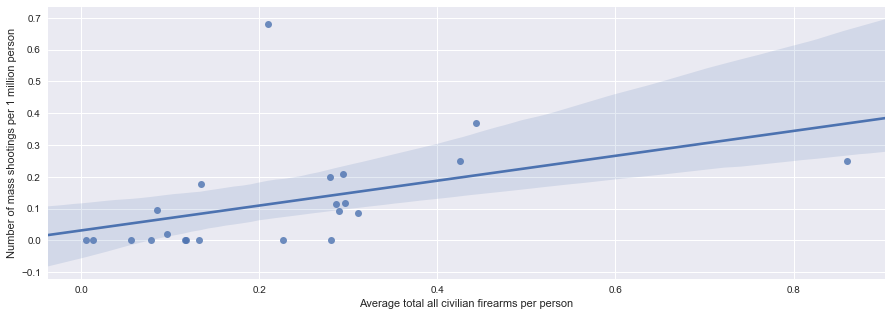

In [153]:
# seaborn
fig = pl.figure(figsize=(15,5))
ax = fig.add_subplot(111)
sns.regplot(x="CivFirearmsPP", y="NumMassShootPP", data=df_)
ax.set_ylabel("Number of mass shootings per 1 million person")
ax.set_xlabel("Average total all civilian firearms per person")
ax.legend()
pl.show()

**Figure 11:** Use seaborn to plot

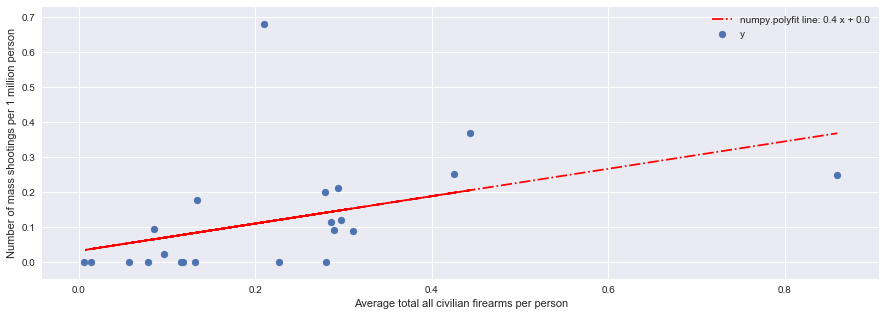

In [154]:
# numpy.polyfit

beta1_np, beta0_np = np.polyfit(df_['CivFirearmsPP'],df_['NumMassShootPP'],1)

fig = pl.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.scatter(df_['CivFirearmsPP'], df_['NumMassShootPP'], label = "y")
ax.plot(df_['CivFirearmsPP'], df_['CivFirearmsPP'] * beta1_np + beta0_np, 'r-.',
        label="numpy.polyfit line: %.1f x + %.1f"\
       %(beta1_np, beta0_np))
ax.set_ylabel("Number of mass shootings per 1 million person")
ax.set_xlabel("Average total all civilian firearms per person")
ax.legend()
pl.show()

**Figure 12:** calculate the best fit with polyfit and polt it

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



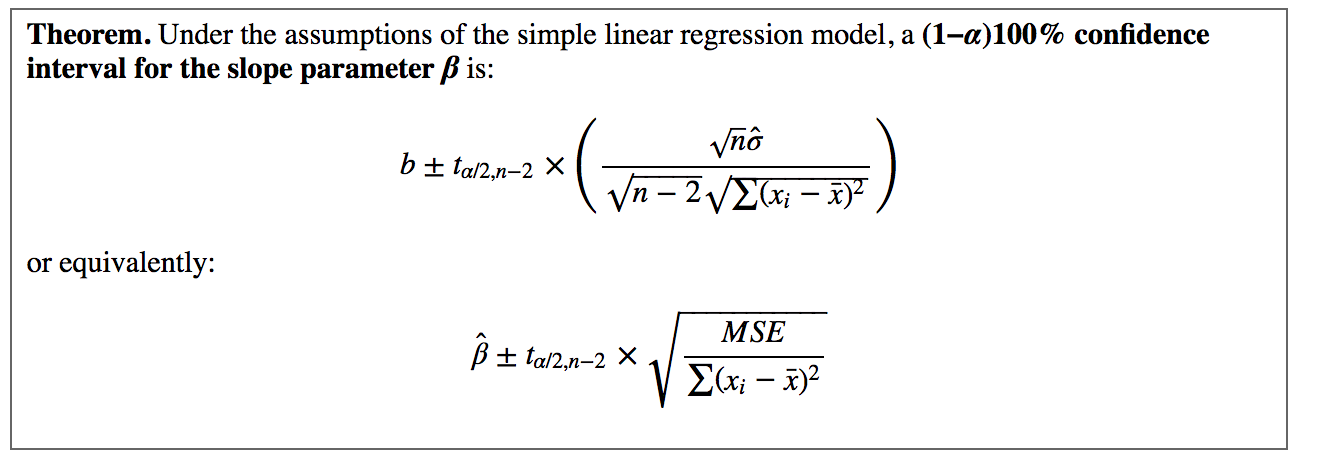

In [78]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/fedhere/PUI2017_fb55/master/Lab5_fb55/confidence_intervals_regression.png')

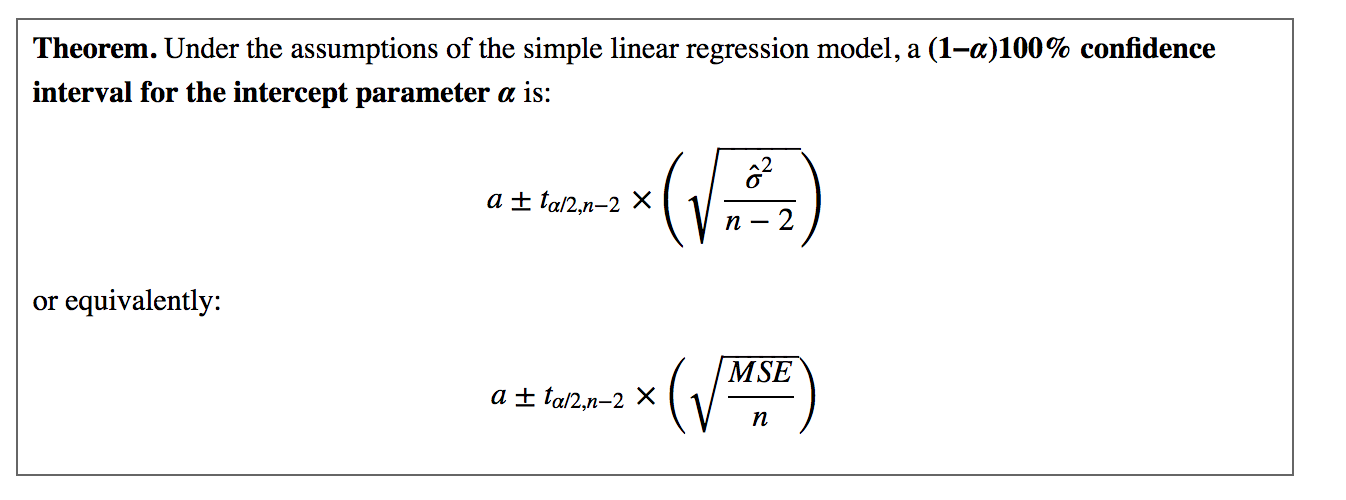

In [79]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/fedhere/PUI2017_fb55/master/Lab5_fb55/confidence_intervals_regression2.png')

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

In [155]:
y_observed = df_['NumMassShootPP']
y_predicted = lm2.predict()
n = len(df_)

sigma = np.sqrt(sum((y_observed - y_predicted) ** 2) / n )
tp = scipy.stats.t.ppf(0.975, n-2)

ci_slope = tp * ( np.sqrt(n) * sigma / ( np.sqrt(n-2) * np.sqrt(sum((df_['CivFirearmsPP'] - df_['CivFirearmsPP'].mean()) ** 2 )) ) )
ci_intercept = tp * np.sqrt(sigma ** 2 / (n-2))              

print(ci_slope)
print(ci_intercept)
print(tp)
print(sigma)

0.387585564499
0.0711309387061
2.08596344727
0.15249894667


In [156]:
lm2.params

Intercept        0.010135
CivFirearmsPP    0.282508
dtype: float64

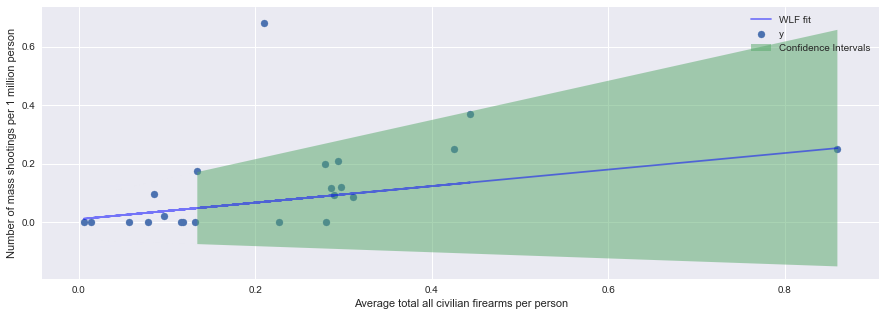

In [157]:
yfit1 = lm2.params[0] - ci_intercept + df_['CivFirearmsPP'] * (lm2.params[1] - ci_slope)
yfit2 = lm2.params[0] + ci_intercept + df_['CivFirearmsPP'] * (lm2.params[1] + ci_slope)

fig = pl.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.scatter(df_['CivFirearmsPP'], df_['NumMassShootPP'], label = "y")
ax.plot(df_['CivFirearmsPP'], lm2.predict(), 'b', alpha=0.5, label='WLF fit')
pl.fill_between(df_['CivFirearmsPP'], yfit1, yfit2, alpha=0.5, label='Confidence Intervals')
#pl.fill_between(df_['CivFirearmsPP'], y_predicted - ci_intercept, y_predicted + ci_intercept, alpha=0.5)
pl.ylabel("Number of mass shootings per 1 million person")
pl.xlabel("Average total all civilian firearms per person")
ax.legend()
pl.show()

**Figure 13:** Confidence Intervals based on WLS

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

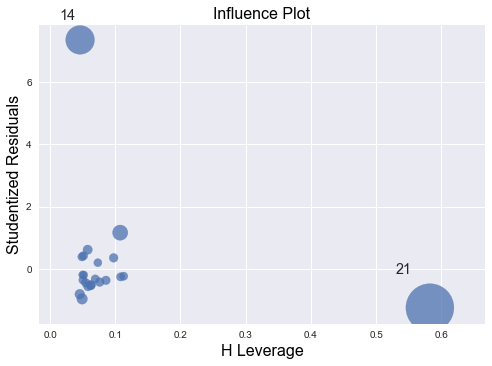

In [158]:
sm.graphics.influence_plot(lm1, alpha  = 0.05, criterion="cooks");

In [169]:
df_.iloc[[14, 21]]

,Country Name,Number of homicides by firearm,Average total all civilian firearms,Country,Guns/100 inhabitants,Number of mass shootings,pop,gdp,homi_pp_1000,CivFirearmsPP,NumMassShootPP
14,New Zealand,7.0,925000.0,New Zealand,22.6,3,4408100.0,1.761930e+11,1.587986,0.209841,0.680565
21,United States,9146.0,270000000.0,United States,88.8,78,313998379.0,1.615530e+13,29.127539,0.859877,0.248409


**Interpret:**
This influence plot shows two data point with high outlyingness. Below is the meanings of the plot:
- x-axis: leverage on the horizontal axis
- y-axis: residual on the vertical axis
- point size: square root of Cook's D statistic, a measure of the influence

New Zealand (NZ) and United States (US) both have large potential of inluence on the model, as shown by circle size. However, NZ has small leverage power although it has high residual. US has small residual but high leverage power, due to its position on the far end from other data points.
In conclusion, NZ is an outlier with little leverage, which will not alter the model (slope, coefficient) drastically. US, could tilt the model if its residual grows large.

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings